## Integración por Monte Carlo

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

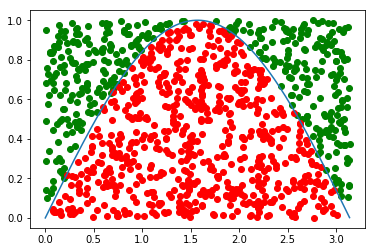

In [5]:
# Número de puntos tirados aleatoriamente
Num= 1000
f= lambda x: np.sin(x)
a,b =0,np.pi
Altura=1

# Puntos aleatorios en (x,y)
x= np.random.uniform(a,b,Num)
y=np.random.uniform(a,Altura,Num)

#Puntos para graficar la función
x_graf=np.arange(a,b,.01)
fx=f(x)

plt.plot(x[y>fx],y[y>fx],"go")
plt.plot(x[y<=fx],y[y<=fx],"ro")
plt.plot(x_graf,f(x_graf))

In [7]:
#Integración por montecarlo
N_0=len(x[y<fx])
Base=b-a
yest=N_0/Num*(Base*Altura)
print(yest)

1.9729201864543902


## Ejercicio 

Grafica la siguiente funión e integrala de 0 a pi 
$$ f(x)=-x^2+10 $$

In [13]:
F= lambda t:-t**2+10
t=np.linspace(0,np.pi,100)

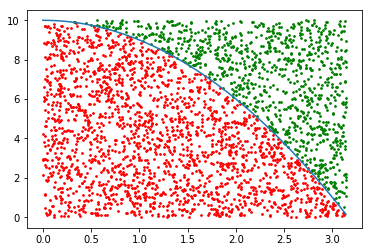

In [14]:
# Número de puntos tirados aleatoriamente
Num= 3000
a,b =0,np.pi
Altura=np.max(F(t))

# Puntos aleatorios en (x,y)
x= np.random.uniform(a,b,Num)
y=np.random.uniform(a,Altura,Num)

#Puntos para graficar la función
x_graf=np.arange(a,b,.01)
fx=F(x)

#plt.plot(x[y>fx],y[y>fx],"go")
#plt.plot(x[y<=fx],y[y<=fx],"ro")
plt.scatter(x[y>fx],y[y>fx],s=3,color='green')
plt.scatter(x[y<=fx],y[y<=fx],s=3,color='red')
plt.plot(x_graf,F(x_graf))

In [15]:
#Integración por montecarlo
N_0=len(x[y<fx])
Base=b-a
yest=N_0/Num*(Base*Altura)
print(yest)

21.404717946458458


## Ejercicio de Tarea

Utilizar la anterior función para aproximar el área de la región descrita por 
$$ 4(2x-1)^4+8(2y-1)^8< 1+2(2y-1)^3(3x-2)^2 $$
Poner los resultados en una tabla en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la paroximación ( usar 10,100,1000,10000 y 100000 términos)

In [16]:
f1= lambda x,y: 4*(2*x-1)**4+8*(2*y-1)**8
f2= lambda x,y: 1+2*(2*y-1)**3*(3*x-2)**2

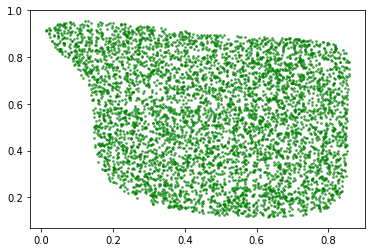

In [17]:
x1=np.random.uniform(0,1,10**4)
y1=np.random.uniform(0,1,10**4)
plt.scatter(x1[f1(x1,y1)<f2(x1,y1)],y1[f1(x1,y1)<f2(x1,y1)],s=3,c='green',alpha=.6)

,10,100,1000,10000,100000
Area,0.7,0.6,0.558,0.545,0.54715


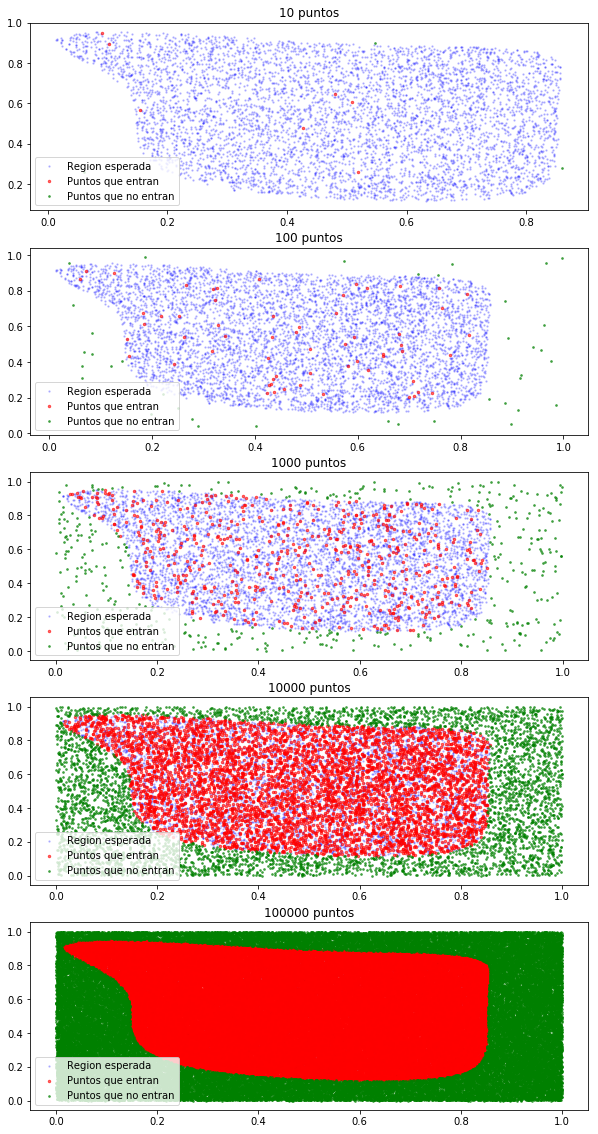

In [20]:
area=[]
fig, axs = plt.subplots(5,figsize=(10,20)) 
for i in range(1,6):
    x=np.random.uniform(0,1,10**i)
    y=np.random.uniform(0,1,10**i)
    N_0=len(x[f1(x,y)<f2(x,y)])
    Area=1
    area.append(N_0/(10**i)*Area)
    axs[i-1].scatter(x1[f1(x1,y1)<f2(x1,y1)],y1[f1(x1,y1)<f2(x1,y1)],s=2,c='blue',alpha=.2,label='Region esperada')
    axs[i-1].scatter(x[f1(x,y)<f2(x,y)],y[f1(x,y)<f2(x,y)],s=6,c='red',alpha=.6,label='Puntos que entran')
    axs[i-1].scatter(x[f1(x,y)>f2(x,y)],y[f1(x,y)>f2(x,y)],s=3,c='green',alpha=.6,label='Puntos que no entran')
    axs[i-1].legend()
    axs[i-1].set_title('{} puntos'.format(10**i))
pd.DataFrame([area],['Area'],[10,100,1000,10000,100000])